<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/kmeans_different_ideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# K-MEANS Clustering Algorithm

In this notebook you will implement the Algorithm from scratch in the pure Python. As a bonus quesiton, you will be asked to use Scikit-learn package to check the performance


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np


## Creating the data

First of all, we need to create the data. We use the synthetic data of "blobs" from the Scikit-learn package


In [2]:
centers = 5
X_train, true_labels = make_blobs(n_samples=300, centers=centers, random_state=42)

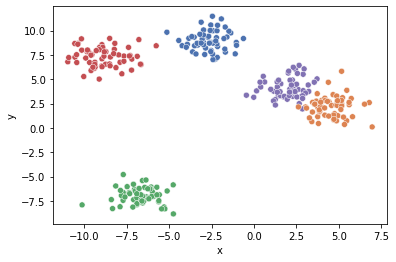

array([[-0.62301172,  9.18886394],
       [ 0.54371399,  5.3052056 ],
       [-2.30033403,  7.054616  ],
       [ 4.41641605,  2.68717018],
       [-3.83738367,  9.21114736]])

In [3]:
def plot_data(X_train, true_labels, plot=True):
    axis = sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=true_labels,
                    palette="deep",
                    legend=None
                    )
    plt.xlabel("x")
    plt.ylabel("y")
    if plot:
        plt.show()
    return axis

plot_data(X_train, true_labels)
X_train[0:5]

## Implementing the KMeans class

You're about to implement the KMeans class: fill in your code

In [4]:
def euclidean(point_a, point_b):
    """
    Euclidean distance between point & data.
    Point_a and point_b has dimensions (m,).
    """
    ########################################
    ########### <Your code here> ###########
    ########################################
    return np.linalg.norm((point_a-point_b)**2, ord=2)

    
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    
    def _select_starting_k_means(self, X_train):
        """
        Randomly select self.n_clusters points from X_train as starting centroids
        """  
        ########################################
        ########### <Your code here> ###########
        ########################################
        return X_train[np.random.choice(range(len(X_train)), self.n_clusters)]

        
    def _find_closest_centroid(self, point):
        """
        Finds the centroid that has the closest distance to our point, returns the centroid idx
        """
        ########################################
        ########### <Your code here> ###########
        ########################################
        return np.argmin(np.array([euclidean(point, c) for c in self.centroids]))
        

    def _calculate_centroids(self, points_per_cluster):
        """
        calculate the centroids of each cluster and returns them as a list of centroids
        """
        ########################################
        ########### <Your code here> ###########
        ########################################
        return np.array([np.mean(cluster, axis=0) for cluster in points_per_cluster])

        
    def fit(self, X_train):
        
        self.centroids = self._select_starting_k_means(X_train)

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        
        while (iteration < self.max_iter) & ((prev_centroids != self.centroids).any()):
            ### <Your code here> KMEANS STOPPING CONDITION ###:
            
            ### assign each point to a cluster ###
            points_per_cluster = [[] for _ in range(self.n_clusters)]        
            for x in X_train:
                ########################################
                ########### <Your code here> ###########
                ########################################
                
                #hint: for each point find the cluster it belongs to and fill points per cluster accordingly
                points_per_cluster[self._find_closest_centroid(x)].append(x)

            
            ### update centroids based on new clusters ###
            
            ########################################
            ########### <Your code here> ###########
            ########################################
            self.centroids = self._calculate_centroids(points_per_cluster)

            # Catch any np.nans, resulting from a centroid having no points
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

## Visualization of the solution

Now you can visualize the solution - plot the centers of the centroids

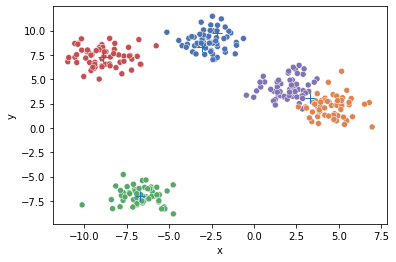

array([[-6.68626728, -6.96943511],
       [-3.05065748,  8.32887388],
       [-2.18756629,  9.79430329],
       [ 3.26972454,  3.11413579],
       [-8.89889839,  7.28107273]])

In [5]:
#test our kmeans model
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

axis = plot_data(X_train, true_labels, plot=False)
axis.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()
kmeans.centroids

## Elbow method

Next, we will ask you to find the optimal number of clusters using the Elbow method that you learned in class. The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

![](https://github.com/borislevant/python4ml/blob/main/img/elbow_method.png?raw=1)

We define the distortion of the K-means clustering to be
$$
SSE(X, C) = \sum_{x \in X} \min_{c\in C} ||x - c||
$$

Let's implement it in the following ``KMeansExt`` class

In [16]:
class KMeansExt(KMeans):
    
    def calculate_sse(self, X):

        sse = 0
        for x in X:
            sse = sse + euclidean(self.centroids[self._find_closest_centroid(x)], x)
            
        return sse


In [17]:
sses = []
for nc in range(1, 10):
    kmeans = KMeansExt(n_clusters=nc)
    kmeans.fit(X_train)
    sses.append(kmeans.calculate_sse(X_train))
    

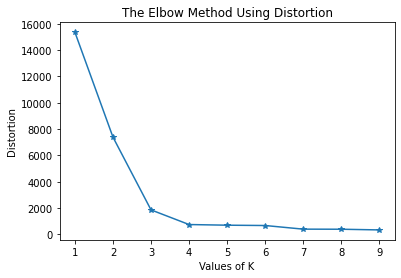

In [18]:
plt.plot(range(1, 10), sses, '-*')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Using Distortion')
plt.show()


## Use the Scikit-Learn library

Implement the K-Means using the ``sklearn.cluster.KMeans`` class